# Laplacian Matrix for XENON1T

Feb 21, 2020

Shixiao Liang, Alex Oranday, Chris Tunnell

In [130]:
import scipy
import numpy as np
import sys
from sklearn.metrics import euclidean_distances
np.set_printoptions(threshold=sys.maxsize)

In [209]:
# Photosensor positions (x,y)
points = np.array([[-1.23456685e+01,  4.60746619e+01],
                   [-4.15732893e+00,  4.75184871e+01],
                   [ 4.15732893e+00,  4.75184871e+01],
                   [ 1.23456685e+01,  4.60746619e+01],
                   [ 2.01588911e+01,  4.32308814e+01],
                   [ 2.73595960e+01,  3.90735525e+01],
                   [ 3.37289935e+01,  3.37289935e+01],
                   [ 3.90735525e+01,  2.73595960e+01],
                   [ 4.32308814e+01,  2.01588911e+01],
                   [ 4.60746619e+01,  1.23456685e+01],
                   [ 4.75184871e+01,  4.15732893e+00],
                   [ 4.75184871e+01, -4.15732893e+00],
                   [ 4.60746619e+01, -1.23456685e+01],
                   [ 4.32308814e+01, -2.01588911e+01],
                   [ 3.90735525e+01, -2.73595960e+01],
                   [ 3.37289935e+01, -3.37289935e+01],
                   [ 2.73595960e+01, -3.90735525e+01],
                   [ 2.01588911e+01, -4.32308814e+01],
                   [ 1.23456685e+01, -4.60746619e+01],
                   [ 4.15732893e+00, -4.75184871e+01],
                   [-4.15732893e+00, -4.75184871e+01],
                   [-1.23456685e+01, -4.60746619e+01],
                   [-2.01588911e+01, -4.32308814e+01],
                   [-2.73595960e+01, -3.90735525e+01],
                   [-3.37289935e+01, -3.37289935e+01],
                   [-3.90735525e+01, -2.73595960e+01],
                   [-4.32308814e+01, -2.01588911e+01],
                   [-4.60746619e+01, -1.23456685e+01],
                   [-4.75184871e+01, -4.15732893e+00],
                   [-4.75184871e+01,  4.15732893e+00],
                   [-4.60746619e+01,  1.23456685e+01],
                   [-4.32308814e+01,  2.01588911e+01],
                   [-3.90735525e+01,  2.73595960e+01],
                   [-3.37289935e+01,  3.37289935e+01],
                   [-2.73595960e+01,  3.90735525e+01],
                   [-2.01588911e+01,  4.32308814e+01],
                   [-1.02880570e+01,  3.83955516e+01],
                   [-2.08035426e+00,  3.96955240e+01],
                   [ 6.21826999e+00,  3.92606115e+01],
                   [ 1.42451260e+01,  3.71098220e+01],
                   [ 2.16494016e+01,  3.33371551e+01],
                   [ 2.81074946e+01,  2.81074946e+01],
                   [ 3.33371551e+01,  2.16494016e+01],
                   [ 3.71098220e+01,  1.42451260e+01],
                   [ 3.92606115e+01,  6.21826999e+00],
                   [ 3.96955240e+01, -2.08035426e+00],
                   [ 3.83955516e+01, -1.02880570e+01],
                   [ 3.54175093e+01, -1.80461224e+01],
                   [ 3.08915520e+01, -2.50154855e+01],
                   [ 2.50154855e+01, -3.08915520e+01],
                   [ 1.80461224e+01, -3.54175093e+01],
                   [ 1.02880570e+01, -3.83955516e+01],
                   [ 2.08035426e+00, -3.96955240e+01],
                   [-6.21826999e+00, -3.92606115e+01],
                   [-1.42451260e+01, -3.71098220e+01],
                   [-2.16494016e+01, -3.33371551e+01],
                   [-2.81074946e+01, -2.81074946e+01],
                   [-3.33371551e+01, -2.16494016e+01],
                   [-3.71098220e+01, -1.42451260e+01],
                   [-3.92606115e+01, -6.21826999e+00],
                   [-3.96955240e+01,  2.08035426e+00],
                   [-3.83955516e+01,  1.02880570e+01],
                   [-3.54175093e+01,  1.80461224e+01],
                   [-3.08915520e+01,  2.50154855e+01],
                   [-2.50154855e+01,  3.08915520e+01],
                   [-1.80461224e+01,  3.54175093e+01],
                   [-8.23044563e+00,  3.07164413e+01],
                   [ 3.10862447e-14,  3.18000000e+01],
                   [ 8.23044563e+00,  3.07164413e+01],
                   [ 1.59000000e+01,  2.75396078e+01],
                   [ 2.24859956e+01,  2.24859956e+01],
                   [ 2.75396078e+01,  1.59000000e+01],
                   [ 3.07164413e+01,  8.23044563e+00],
                   [ 3.18000000e+01,  0.00000000e+00],
                   [ 3.07164413e+01, -8.23044563e+00],
                   [ 2.75396078e+01, -1.59000000e+01],
                   [ 2.24859956e+01, -2.24859956e+01],
                   [ 1.59000000e+01, -2.75396078e+01],
                   [ 8.23044563e+00, -3.07164413e+01],
                   [-1.33226763e-14, -3.18000000e+01],
                   [-8.23044563e+00, -3.07164413e+01],
                   [-1.59000000e+01, -2.75396078e+01],
                   [-2.24859956e+01, -2.24859956e+01],
                   [-2.75396078e+01, -1.59000000e+01],
                   [-3.07164413e+01, -8.23044563e+00],
                   [-3.18000000e+01,  3.55271368e-15],
                   [-3.07164413e+01,  8.23044563e+00],
                   [-2.75396078e+01,  1.59000000e+01],
                   [-2.24859956e+01,  2.24859956e+01],
                   [-1.59000000e+01,  2.75396078e+01],
                   [-6.17283423e+00,  2.30373310e+01],
                   [ 2.07866446e+00,  2.37592435e+01],
                   [ 1.00794455e+01,  2.16154407e+01],
                   [ 1.68644967e+01,  1.68644967e+01],
                   [ 2.16154407e+01,  1.00794455e+01],
                   [ 2.37592435e+01,  2.07866446e+00],
                   [ 2.30373310e+01, -6.17283423e+00],
                   [ 1.95367763e+01, -1.36797980e+01],
                   [ 1.36797980e+01, -1.95367763e+01],
                   [ 6.17283423e+00, -2.30373310e+01],
                   [-2.07866446e+00, -2.37592435e+01],
                   [-1.00794455e+01, -2.16154407e+01],
                   [-1.68644967e+01, -1.68644967e+01],
                   [-2.16154407e+01, -1.00794455e+01],
                   [-2.37592435e+01, -2.07866446e+00],
                   [-2.30373310e+01,  6.17283423e+00],
                   [-1.95367763e+01,  1.36797980e+01],
                   [-1.36797980e+01,  1.95367763e+01],
                   [-4.11522282e+00,  1.53582206e+01],
                   [ 4.11522282e+00,  1.53582206e+01],
                   [ 1.12429978e+01,  1.12429978e+01],
                   [ 1.53582206e+01,  4.11522282e+00],
                   [ 1.53582206e+01, -4.11522282e+00],
                   [ 1.12429978e+01, -1.12429978e+01],
                   [ 4.11522282e+00, -1.53582206e+01],
                   [-4.11522282e+00, -1.53582206e+01],
                   [-1.12429978e+01, -1.12429978e+01],
                   [-1.53582206e+01, -4.11522282e+00],
                   [-1.53582206e+01,  4.11522282e+00],
                   [-1.12429978e+01,  1.12429978e+01],
                   [-2.05761141e+00,  7.67911032e+00],
                   [ 5.62149891e+00,  5.62149891e+00],
                   [ 7.67911032e+00, -2.05761141e+00],
                   [ 2.05761141e+00, -7.67911032e+00],
                   [-5.62149891e+00, -5.62149891e+00],
                   [-7.67911032e+00,  2.05761141e+00],
                   [ 0.00000000e+00,  0.00000000e+00]])


In [210]:
dead = np.array([1, 2, 12, 26, 34, 62, 65, 79,
                 86, 88, 102, 118, 27, 73, 91])
dead = []

mask = ~np.isin(np.arange(points.shape[0]), 
                dead)
points = points[mask]
n = points.shape[0]

In [372]:
def plot_distances(points,
                   threshold = 1000, # cm
                   distance=True, # encode distance?
                   plot=True,
                   filename='plot.png'):
    distances = euclidean_distances(points)
    distances[distances > threshold] = 0
    if not distance:
        distances = distances != 0
    
    
    matrices = {'Degree' : np.diag((distances != 0).sum(axis=1)),
                 'Adjacency' : distances,
               }
    
    matrices['Laplacian'] = matrices['Degree'] - matrices['Adjacency']
    
    if plot:
        plt.figure(figsize=(15,4))

        for i, (name, matrix) in enumerate(matrices.items()):
            plt.subplot(1, 3, i+1)
            plt.imshow(matrix)
            plt.colorbar()
            plt.title(name)
            plt.xlabel('Sensor ID')
            plt.ylabel('Sensor ID')
        
        plt.savefig(filename)
        plt.show()
        
        
    return matrices

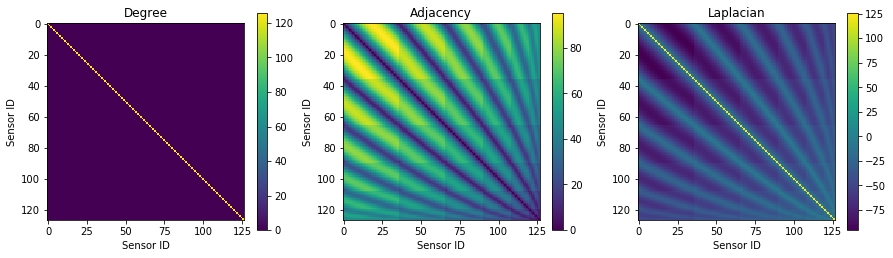

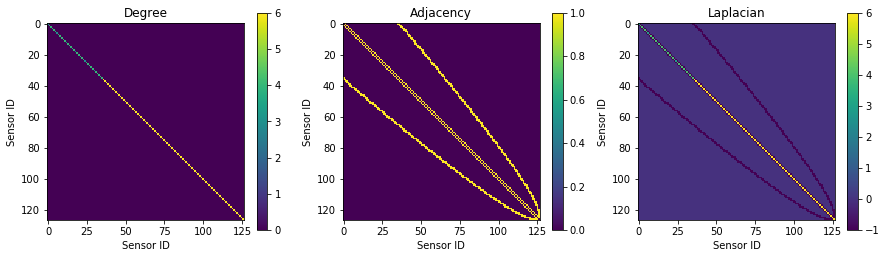

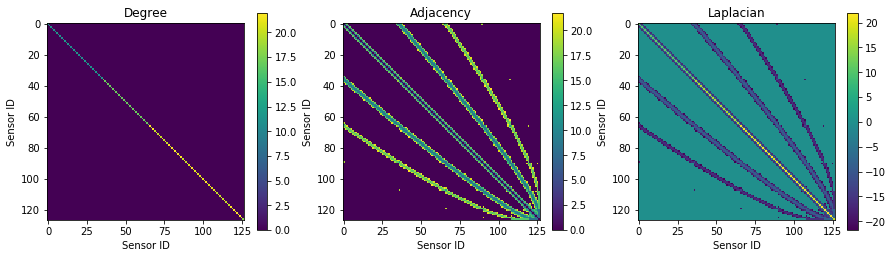

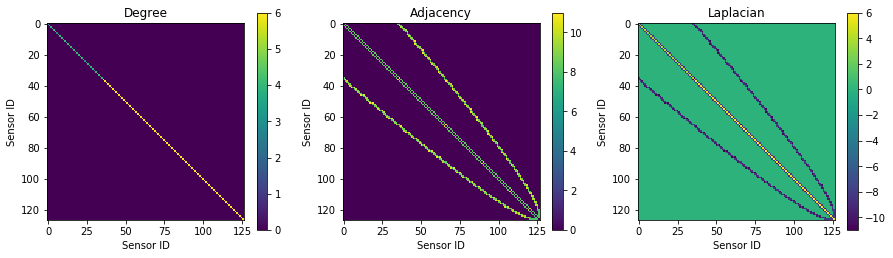

In [373]:

options = {'triangulated_without_distance' : {"threshold":11, "distance":False},
           'nearest_with_distance' : {"threshold":11, "distance":True},
           'many_neighbors_with_distance' : {"threshold":2*11, "distance":True},
           'no_threshold' : {"threshold": 10000, "distance":True},
           
          }
           
for name, option in options.items():
    option['filename'] = '%s.png' % name
    
    _= plot_distances(points, **option)
    

## Appendix:

Check that Delauny triangulation is same as threshold=10

Use triangulation to make a graph

In [342]:
from scipy.spatial import Delaunay
tri = Delaunay(points)

In [343]:
simplices = tri.simplices.copy()
mask2 = np.isin(simplices, dead).sum(axis=1, dtype=bool)
simplices[mask2].shape

(0, 3)

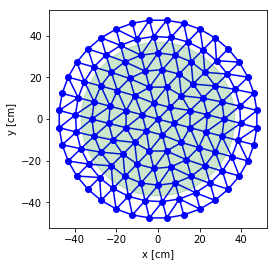

In [358]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

circle1 = plt.Circle((0, 0), 36.94, color = 'green', alpha=0.2)

plt.triplot(points[:,0], points[:,1],
            simplices, color='blue')
plt.plot(points[:,0], points[:,1], 'o', color='blue')

ax.add_artist(circle1)
plt.xlabel("x [cm]")
plt.ylabel("y [cm]")
ax.set_aspect('equal')
plt.show()

Setup matrices

In [356]:
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.Delaunay.html
indices, indptr = tri.vertex_neighbor_vertices

# Adjacency matrix
A = np.zeros(shape=(n, n))
D = np.zeros(shape=(n, n))

# Compute degree, adjacency, and laplacian matrix

for k in range(n):
    vertex_neighbors = indptr[indices[k]:indices[k+1]]
    
    D[k, k] = vertex_neighbors.size
    
    for neighbor in vertex_neighbors:
        A[k, neighbor] = 1
    
# Laplacian matrix
L = D - A

In [357]:
matrices = plot_distances(points, 12, plot=False)
assert ((A==0) == (matrices['Adjacency'] ==0)).all()
assert (D == matrices['Degree']).all()